In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

NameError: name 'plt' is not defined

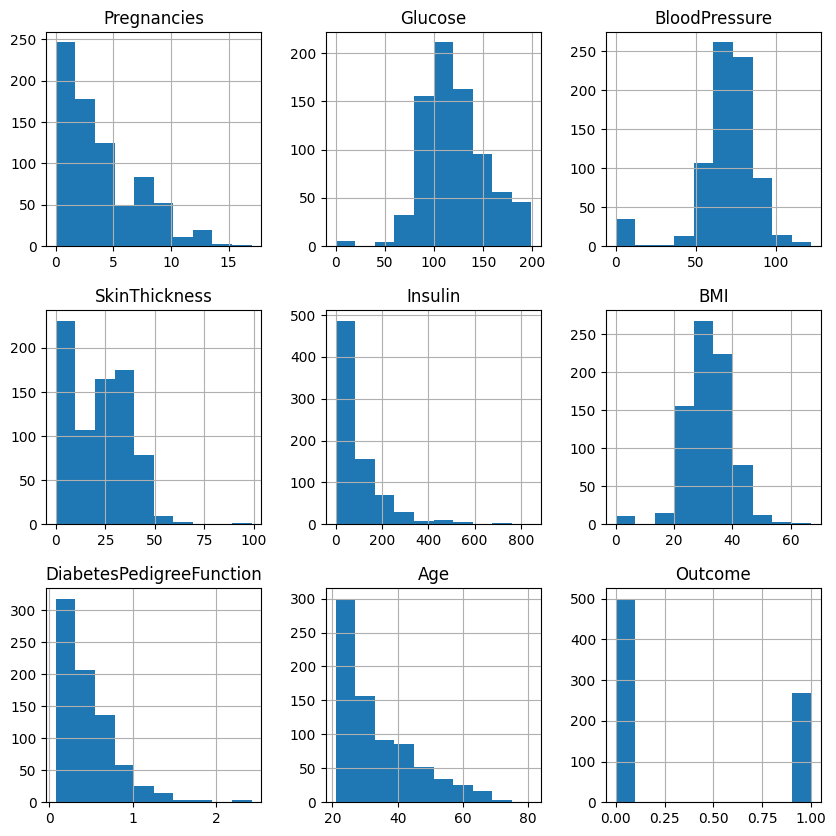

In [13]:
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

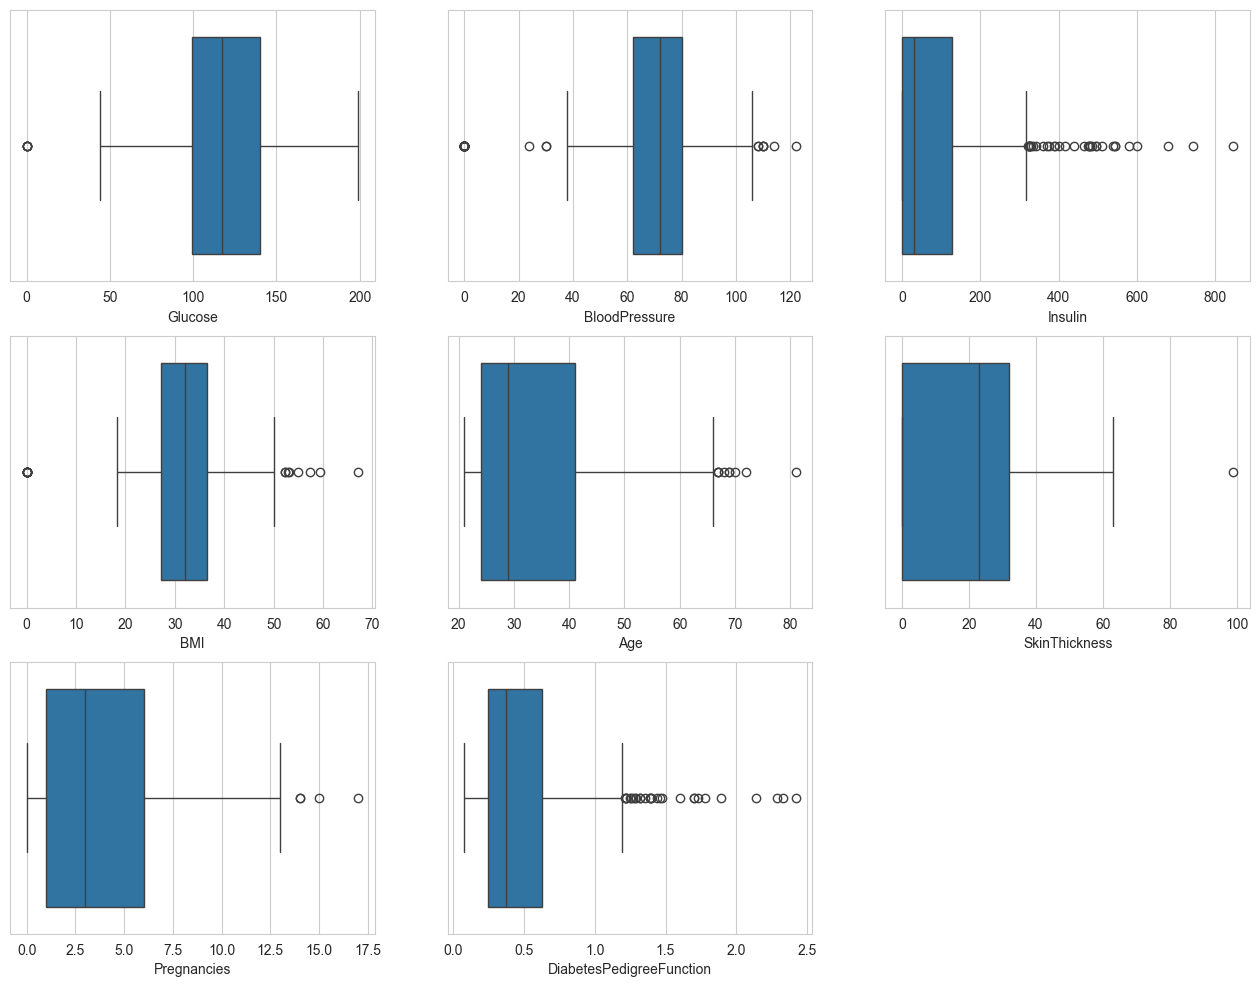

In [17]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=diabetes_dataset)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=diabetes_dataset)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=diabetes_dataset)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=diabetes_dataset)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=diabetes_dataset)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=diabetes_dataset)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=diabetes_dataset)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes_dataset)

In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [14]:
classifier = KNeighborsClassifier()

In [15]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [16]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7980456026058632


In [18]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [19]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7272727272727273


In [22]:
input_data = (1,80,55,0,0,19.1,0.258,21)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


c:\Users\91962\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
